# PART 1: STATISTICAL FORECAST

## 1. Import libraries and create demand array

In [ ]:
#import libraries
import numpy as np
import pandas as pd

#create the demand array
demand = np.random.randint(low= 100, high=300, size=36, dtype=int)
print(demand)

[253 154 103 103 142 284 231 105 146 198 161 205 178 232 142 276 186 236
 133 180 104 201 284 254 202 224 110 164 255 114 192 154 204 238 101 211]


## 2. Forecasting KPIs

In [ ]:
def KPI(df):
    print("Forecast KPIs are as below:")

    #calculate some average values
    avg_error = df["Error"].mean()
    avg_demand = df["Demand"].mean()

    #bias
    bias = avg_error
    print("Bias value is {:.2f}".format(bias))
    print("Bias% value is {:.2%}".format(bias/avg_demand))

    #MAD - Mean Absolute Deviation
    MAD = (df["Demand"]-avg_demand).abs().mean()
    print("MAD value is {:.2f}".format(MAD))
    print("MAD% value is {:.2%}".format(MAD/avg_demand))

    #MAE - Mean Absolute Error
    MAE = df["Error"].abs().mean()
    print("MAE value is {:.2f}".format(MAE))
    print("MAE% value is {:.2%}".format(MAE/avg_demand))

    #MAPE - Mean Absolute Percentage Error
    MAPE = (df["Error"]/df["Demand"]).abs().mean()
    print("MAPE value is {:.2%}".format(MAPE))

    #MSE - Mean Square Error
    MSE = (df["Error"]**2).mean()
    print("MSE value is {:.2f}".format(MSE))

    #RMSE - Root Mean Square Error
    RMSE = MSE**(1/2)
    print("RMSE value is {:.2f}".format(RMSE))
    print("RMSE% value is {:.2%}".format(RMSE/avg_demand))

## 3. Moving Average

In [ ]:
def moving_average(demand):

    #create the forecast array
    forecast = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #determine the average period
    avg_period = int(input("Please input the average period"))

    #update the demand array
    demand = np.append(demand, fcst_period*np.NaN)

    #update the forecast array
    forecast = np.append(forecast,fcst_period*np.NaN)

    #caculate the forecast
    for i in range (avg_period,len(demand)):
        forecast[i] = np.mean(demand[i-avg_period:i])

    #visualize the data
    df = pd.DataFrame({'Demand':demand,'Forecast':forecast,'Error':demand - forecast})
    df.plot()

    KPI(df)

Please input the forecast period1
Please input the average period3
Forecast KPIs are as below:
Bias value is 2.05
Bias% value is 1.11%
MAD value is 47.28
MAD% value is 25.56%
MAE value is 57.83
MAE% value is 31.26%
MAPE value is 35.40%
MSE value is 4748.66
RMSE value is 68.91
RMSE% value is 37.25%


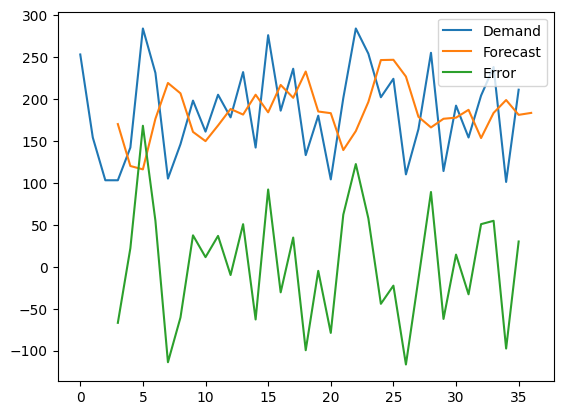

In [ ]:
moving_average(demand)

## 4. Simple Exponential Smoothing

In [ ]:
def simple_exponential_smoothing(demand):

    #create forecast array
    forecast = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand and forecast array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)

    #create the alpha parameter
    alpha = float(input("Please input the alpha parameter"))

    #initiate first forecast
    forecast[0] = demand[0]

    #calculate other forecast
    for i in range (1,len(forecast)):
        forecast[i] = alpha*demand[i-1]+(1-alpha)*forecast[i-1]

    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast,'Error':demand - forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the alpha parameter 0.6


Forecast KPIs are as below:
Bias value is 5.69
Bias% value is 2.88%
MAD value is 54.06
MAD% value is 27.37%
MAE value is 62.38
MAE% value is 31.58%
MAPE value is 36.58%
MSE value is 5396.83
RMSE value is 73.46
RMSE% value is 37.20%


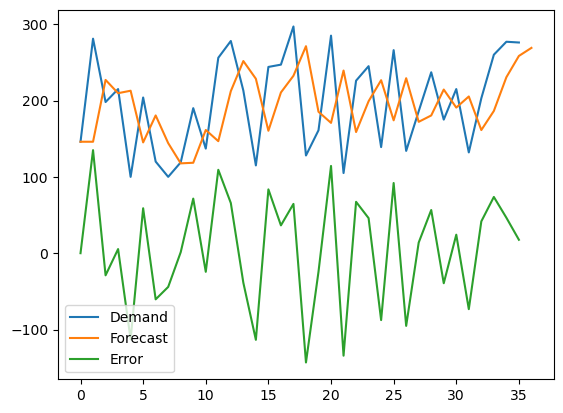

In [ ]:
simple_exponential_smoothing(demand)

## 5. Double Exponential Smoothing

In [ ]:
def double_exp_smoothing(demand):
    #create forecast, level, trend array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)

    #create the alpha & beta parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))

    #intiate first forecast
    level[0] = demand[0]
    trend[0] = demand[1]-demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    #calculate the rest
    for i in range (2,len(forecast)):
        level[i-1] = alpha*demand[i-1]+(1-alpha)*(level[i-2]+trend[i-2])
        trend[i-1] = beta*(level[i-1]-level[i-2])+(1-beta)*trend[i-2]
        forecast[i] = level[i-1]+trend[i-1]

    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast, "Error":demand-forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4


Forecast KPIs are as below:
Bias value is -13.08
Bias% value is -6.62%
MAD value is 54.06
MAD% value is 27.37%
MAE value is 76.60
MAE% value is 38.79%
MAPE value is 46.56%
MSE value is 9080.42
RMSE value is 95.29
RMSE% value is 48.25%


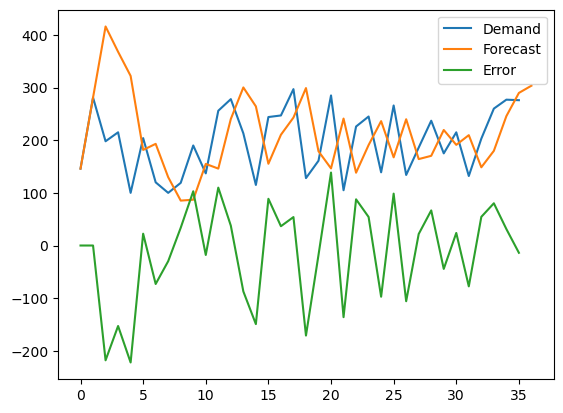

In [ ]:
double_exp_smoothing(demand)

## 6. Double Exponential Smoothing With Damped Trend

In [ ]:
def double_exp_smoothing_with_damped_trend(demand):
    #create forecast, level, trend array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)

    #create the alpha & beta parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))
    phi = float(input("Please input the phi parameter"))

    #intiate first forecast
    level[0] = demand[0]
    trend[0] = demand[1]-demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    #calculate the rest
    for i in range (2,len(forecast)):
        level[i-1] = alpha*demand[i-1]+(1-alpha)*(level[i-2]+phi*trend[i-2])
        trend[i-1] = beta*(level[i-1]-level[i-2])+(1-beta)*phi*trend[i-2]
        forecast[i] = level[i-1]+trend[i-1]

    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast, "Error":demand-forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4
Please input the phi parameter 0.7


Forecast KPIs are as below:
Bias value is -6.07
Bias% value is -3.07%
MAD value is 54.06
MAD% value is 27.37%
MAE value is 71.05
MAE% value is 35.98%
MAPE value is 42.62%
MSE value is 7251.75
RMSE value is 85.16
RMSE% value is 43.12%


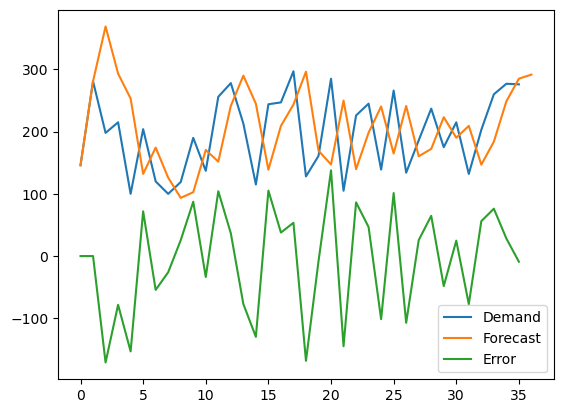

In [ ]:
double_exp_smoothing_with_damped_trend(demand)

## 7. Triple Exponential Smoothing (Multiplicative) With Damped Trend

In [ ]:
def tri_exp_smoothing_with_damped_trend(demand):
    #create forecast, level, trend, season array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)
    season = np.full(len(demand),np.NaN)

    #determine the season length
    season_length = int(input("Please input the season length"))

    #calculate average monthly demand
    average_monthly_demand = (demand[:].sum())/(demand.shape[0])

    #calculate average each month demand
    average_each_month_demand = np.full(season_length,np.NaN)

    #calculate seasonal index for first cycle
    for i in range(0,season_length):
        average_each_month_demand[i]=demand[i:len(demand):season_length].mean()
        season[i]=average_each_month_demand[i]/average_monthly_demand

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)
    season = np.append(season,fcst_period*np.NaN)

    #create the alpha, beta, phi, gamma parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))
    phi = float(input("Please input the phi parameter"))
    gamma = float(input("Please input the gamma parameter"))

    #forecast initiate
    forecast[0]=demand[0]
    level[0]=demand[0]/season[0]
    trend[0]=demand[1]/season[1]-demand[0]/season[0]

    #forecast for the first cycle
    for i in range (1,season_length):
        forecast[i]=(level[i-1]+phi*trend[i-1])*season[i]
        level[i]=alpha*demand[i]/season[i]+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
    #forecast for the rest cycle
    for i in range (season_length,len(demand)):
        forecast[i]=(level[i-1]+phi*trend[i-1])*season[i-season_length]
        level[i]=alpha*demand[i]/season[i-season_length]+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
        season[i]=gamma*demand[i]/level[i]+(1-gamma)*season[i-season_length]

    df = pd.DataFrame.from_dict({"Demand":demand,"Forecast":forecast,"Error":demand-forecast})
    df.plot()
    KPI(df)

Please input the season length 12
Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4
Please input the phi parameter 0.7
Please input the gamma parameter 0.6


Forecast KPIs are as below:
Bias value is -4.59
Bias% value is -2.32%
MAD value is 54.06
MAD% value is 27.37%
MAE value is 59.98
MAE% value is 30.37%
MAPE value is 33.31%
MSE value is 5095.32
RMSE value is 71.38
RMSE% value is 36.14%


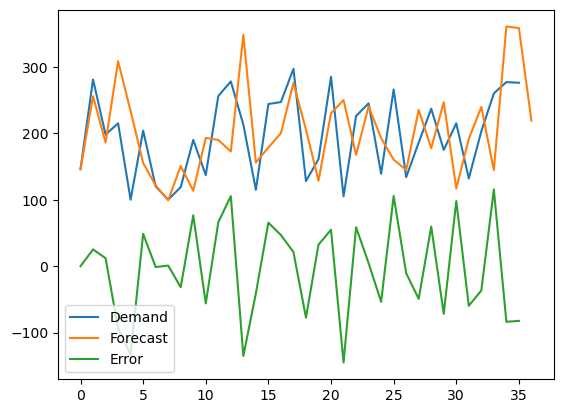

In [ ]:
tri_exp_smoothing_with_damped_trend(demand)

## 7. Triple Exponential Smoothing (Additive) With Damped Trend

In [ ]:
def tri_exp_smoothing_with_damped_trend_additive(demand):
    #create forecast, level, trend, season array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)
    season = np.full(len(demand),np.NaN)

    #determine the season length
    season_length = int(input("Please input the season length"))

    #calculate average monthly demand
    average_monthly_demand = (demand[:].sum())/(demand.shape[0])

    #calculate average each month demand
    average_each_month_demand = np.full(season_length,np.NaN)

    #calculate seasonal index for first cycle
    for i in range(0,season_length):
        average_each_month_demand[i]=demand[i:len(demand):season_length].mean()
        season[i]=average_each_month_demand[i]-average_monthly_demand

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)
    season = np.append(season,fcst_period*np.NaN)

    #create the alpha, beta, phi, gamma parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))
    phi = float(input("Please input the phi parameter"))
    gamma = float(input("Please input the gamma parameter"))

    #forecast initiate
    forecast[0]=demand[0]
    level[0]=demand[0]-season[0]
    trend[0]=(demand[1]-season[1])-(demand[0]-season[0])

    #forecast for the first cycle
    for i in range (1,season_length):
        forecast[i]=level[i-1]+phi*trend[i-1]+season[i]
        level[i]=alpha*(demand[i]-season[i])+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
    #forecast for the rest cycle
    for i in range (season_length,len(demand)):
        forecast[i]=level[i-1]+phi*trend[i-1]+season[i-season_length]
        level[i]=alpha*(demand[i]-season[i-season_length])+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
        season[i]=gamma*(demand[i]-level[i])+(1-gamma)*season[i-season_length]

    df = pd.DataFrame.from_dict({"Demand":demand,"Forecast":forecast,"Error":demand-forecast})
    df.plot()
    KPI(df)

Please input the season length 12
Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4
Please input the phi parameter 0.7
Please input the gamma parameter 0.6


Forecast KPIs are as below:
Bias value is -2.29
Bias% value is -1.16%
MAD value is 54.06
MAD% value is 27.37%
MAE value is 57.22
MAE% value is 28.97%
MAPE value is 32.75%
MSE value is 4722.95
RMSE value is 68.72
RMSE% value is 34.80%


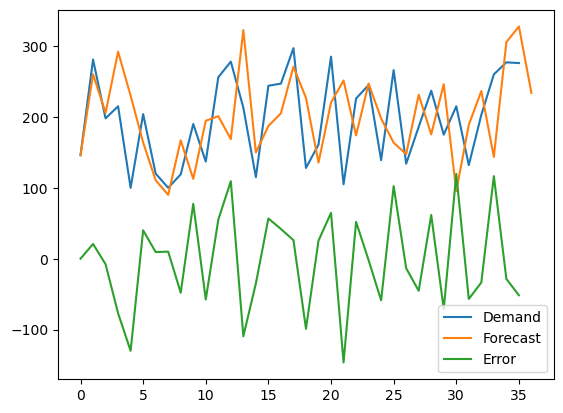

In [ ]:
tri_exp_smoothing_with_damped_trend_additive(demand)